# Model building

In [1]:
# fit and evaluate an AR model
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
import xarray as xr
from datetime import datetime, timedelta

# Open the dataset
xds = xr.open_dataset("HELSINKI_100x100m_3mo.nc4", decode_times=False)


In [3]:
xds

<xarray.Dataset>
Dimensions:            (height: 1, lat: 164, lon: 127, time: 26497)
Coordinates:
  * height             (height) float32 50.0
  * lat                (lat) float32 60.12706 60.12796 ... 60.273193 60.274094
  * lon                (lon) float32 24.831879 24.833687 ... 25.0577 25.059505
  * time               (time) int32 0 300 600 900 ... 7948200 7948500 7948800
Data variables:
    fmi_no             (time, height, lat, lon) float32 ...
    fmi_no2            (time, height, lat, lon) float32 ...
    fmi_pm10p0         (time, height, lat, lon) float32 ...
    fmi_pm2p5          (time, height, lat, lon) float32 ...
    fmi_rel_humid      (time, height, lat, lon) float32 ...
    fmi_so2            (time, height, lat, lon) float32 ...
    fmi_temp_2m        (time, lat, lon) float32 ...
    fmi_windspeed_10m  (time, lat, lon) float32 ...
    megasense_aqi      (time, height, lat, lon) float32 ...
    megasense_co       (time, height, lat, lon) float32 ...
    megasense_no2      (time, height, lat, lon) float32 ...
    megasense_o3       (time, height, lat, lon) float32 ...
    megasense_pm10p0   (time, height, lat, lon) float32 ...
    megasense_pm2p5    (time, height, lat, lon) float32 ...
Attributes:
    Conventions:            CF-1.3
    SIMULATION_START_DATE:  2019-06-01T00:00:00Z
    grid_projection:        lonlat
    pole_lat:               -90.0
    pole_lon:               0.0
    title:                  MEGASENSE_SILAM_SIMULATION
    source:                 SILAM v5_7 SVN (r590117) and MEGASENSE
    NCO:                    netCDF Operators version 4.9.1 (Homepage = http:/...
    authors:                Jonatan Hamberg<jonatan.hamberg@helsinki.fi>\nJoh...
    history:                Tue Sep 22 11:03:30 2020: ncks -d lat,60.126977,6...

In [4]:
d = xds.head(1000)


# Preprocessing and cleaning


In [ ]:
d = d.to_dataframe()
d = d.fillna(0)
d = d.drop(columns=["megasense_aqi"])
d

In [13]:
from sklearn import preprocessing

x = d.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)

In [31]:
maxvals = {}
for v in d.columns:
    maxvals[v] = d[v].max()
maxvals

{'fmi_no': 40.3753,
 'fmi_no2': 36.45971,
 'fmi_pm10p0': 128.51004,
 'fmi_pm2p5': 93.31099,
 'fmi_rel_humid': 0.9753696,
 'fmi_so2': 4.387858,
 'fmi_temp_2m': 290.55566,
 'fmi_windspeed_10m': 8.904197,
 'megasense_co': 73409.336,
 'megasense_no2': 3898.7043,
 'megasense_o3': 2967.6738,
 'megasense_pm10p0': 726.96625,
 'megasense_pm2p5': 543.3613}

In [22]:
o = {}
i = 0
for c in d.columns:
    o[i] = c
    i += 1
df2 = df.rename(columns=o)
df2

,fmi_no,fmi_no2,fmi_pm10p0,fmi_pm2p5,fmi_rel_humid,fmi_so2,fmi_temp_2m,fmi_windspeed_10m,megasense_co,megasense_no2,megasense_o3,megasense_pm10p0,megasense_pm2p5
0,0.000000,0.000000,0.000000e+00,0.000000,0.649149,0.000000,0.159681,0.847625,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000,7.887037e-21,0.000000,0.650323,0.000000,0.159573,0.844533,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,3.169311e-07,0.000000,0.652752,0.000000,0.159367,0.838350,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,1.176921e-03,0.000000,0.655182,0.000000,0.159159,0.832167,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,2.125586e-03,0.000000,0.657611,0.000000,0.158941,0.825984,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20827995,0.054014,0.053891,8.723521e-02,0.054003,0.491664,0.050943,0.992243,0.726884,0.0,0.0,0.0,0.0,0.0
20827996,0.052883,0.052763,8.719266e-02,0.052957,0.489924,0.049882,0.994518,0.722850,0.0,0.0,0.0,0.0,0.0
20827997,0.051370,0.051238,8.680309e-02,0.051378,0.488700,0.048496,0.996523,0.718802,0.0,0.0,0.0,0.0,0.0
20827998,0.050326,0.050181,8.621840e-02,0.050393,0.487993,0.047548,0.998266,0.714739,0.0,0.0,0.0,0.0,0.0


# Vector Auto Regression model

In [26]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from statsmodels.tsa.vector_ar.var_model import VAR
#creating the train and validation set
train = df2[:int(0.8*(len(df2)))]
valid = df2[int(0.8*(len(df2))):]

#fit the model

model = VAR(endog=train)


In [27]:
model_fit = model.fit()

In [34]:
# make prediction on validation
prediction = model_fit.forecast(model_fit.y, steps=len(valid))

In [38]:
predf = pd.DataFrame(prediction)
predf = predf.rename(columns=o)

In [43]:
for v in d.columns:
    predf[v] = predf[v]*maxvals[v]
predf

,fmi_no,fmi_no2,fmi_pm10p0,fmi_pm2p5,fmi_rel_humid,fmi_so2,fmi_temp_2m,fmi_windspeed_10m,megasense_co,megasense_no2,megasense_o3,megasense_pm10p0,megasense_pm2p5
0,1.186045,1.072028,6.106435,2.745949,0.774928,0.124888,93.439986,6.036673,99.039477,2.900638,1.105398,0.142243,0.087989
1,1.214583,1.097771,6.274367,2.812694,0.773463,0.128026,93.754461,6.026678,170.124050,4.908261,2.059427,0.260016,0.176267
2,1.243862,1.124184,6.440491,2.881028,0.771983,0.131240,94.070352,6.016805,221.994297,6.369385,2.796416,0.354026,0.247364
3,1.273761,1.151156,6.604642,2.950691,0.770488,0.134517,94.387769,6.007070,260.144909,7.449386,3.348356,0.426289,0.302077
4,1.304163,1.178582,6.766652,3.021430,0.768977,0.137844,94.706771,5.997489,288.347223,8.252370,3.758747,0.481091,0.343546
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4165595,1.977830,1.785128,9.616092,4.578828,0.482823,0.206724,113.298906,5.706003,363.670216,10.274095,4.604423,0.742439,0.549590
4165596,1.977830,1.785128,9.616092,4.578828,0.482823,0.206724,113.298906,5.706003,363.670216,10.274095,4.604423,0.742439,0.549590
4165597,1.977830,1.785128,9.616092,4.578828,0.482823,0.206724,113.298906,5.706003,363.670216,10.274095,4.604423,0.742439,0.549590
4165598,1.977830,1.785128,9.616092,4.578828,0.482823,0.206724,113.298906,5.706003,363.670216,10.274095,4.604423,0.742439,0.549590


In [47]:
predf.plot(y=["fmi_no2"])

KeyboardInterrupt: 

In [59]:
ppp = predf.head(1000)
vvv = valid.head(1000).reset_index()
vvv

,index,fmi_no,fmi_no2,fmi_pm10p0,fmi_pm2p5,fmi_rel_humid,fmi_so2,fmi_temp_2m,fmi_windspeed_10m,megasense_co,megasense_no2,megasense_o3,megasense_pm10p0,megasense_pm2p5
0,16662400,0.028529,0.028557,0.045795,0.028571,0.789624,0.027688,0.322752,0.674337,0.0,0.0,0.0,0.0,0.0
1,16662401,0.028405,0.028433,0.045373,0.028447,0.783264,0.027657,0.324982,0.669582,0.0,0.0,0.0,0.0,0.0
2,16662402,0.028290,0.028318,0.044975,0.028332,0.776904,0.027609,0.327217,0.664826,0.0,0.0,0.0,0.0,0.0
3,16662403,0.028139,0.028168,0.044512,0.028181,0.770545,0.027524,0.329453,0.660071,0.0,0.0,0.0,0.0,0.0
4,16662404,0.028109,0.028138,0.044032,0.028152,0.764185,0.027569,0.331682,0.655316,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,16663395,0.029085,0.029111,0.048002,0.029127,0.818983,0.027927,0.316885,0.693238,0.0,0.0,0.0,0.0,0.0
996,16663396,0.028810,0.028836,0.047591,0.028852,0.814392,0.027685,0.315554,0.691866,0.0,0.0,0.0,0.0,0.0
997,16663397,0.028568,0.028594,0.047226,0.028610,0.808910,0.027481,0.316006,0.688805,0.0,0.0,0.0,0.0,0.0
998,16663398,0.028351,0.028378,0.046863,0.028393,0.802538,0.027320,0.318235,0.684056,0.0,0.0,0.0,0.0,0.0


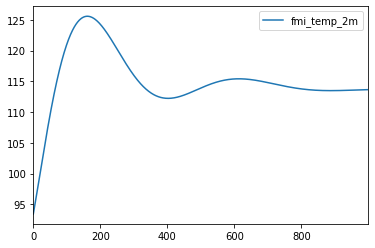

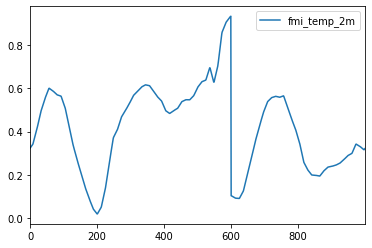

In [67]:
ppp.plot(y=["fmi_temp_2m"])
vvv.plot(y=["fmi_temp_2m"])

In [68]:
newnames = {}
for v in ppp.columns:
    newnames[v] = v + "_predicted"
ppp2 = ppp.rename(columns=newnames)
ppp2

,fmi_no_predicted,fmi_no2_predicted,fmi_pm10p0_predicted,fmi_pm2p5_predicted,fmi_rel_humid_predicted,fmi_so2_predicted,fmi_temp_2m_predicted,fmi_windspeed_10m_predicted,megasense_co_predicted,megasense_no2_predicted,megasense_o3_predicted,megasense_pm10p0_predicted,megasense_pm2p5_predicted
0,1.186045,1.072028,6.106435,2.745949,0.774928,0.124888,93.439986,6.036673,99.039477,2.900638,1.105398,0.142243,0.087989
1,1.214583,1.097771,6.274367,2.812694,0.773463,0.128026,93.754461,6.026678,170.124050,4.908261,2.059427,0.260016,0.176267
2,1.243862,1.124184,6.440491,2.881028,0.771983,0.131240,94.070352,6.016805,221.994297,6.369385,2.796416,0.354026,0.247364
3,1.273761,1.151156,6.604642,2.950691,0.770488,0.134517,94.387769,6.007070,260.144909,7.449386,3.348356,0.426289,0.302077
4,1.304163,1.178582,6.766652,3.021430,0.768977,0.137844,94.706771,5.997489,288.347223,8.252370,3.758747,0.481091,0.343546
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.951706,1.761587,9.502793,4.518445,0.497569,0.204049,113.651472,5.757069,364.347923,10.308541,4.622765,0.740917,0.547797
996,1.951739,1.761617,9.502895,4.518520,0.497512,0.204053,113.653027,5.756921,364.346879,10.308520,4.622685,0.740943,0.547818
997,1.951770,1.761645,9.502990,4.518591,0.497456,0.204056,113.654565,5.756775,364.345792,10.308496,4.622604,0.740970,0.547839
998,1.951799,1.761671,9.503078,4.518658,0.497399,0.204060,113.656085,5.756632,364.344661,10.308470,4.622524,0.740996,0.547860


In [72]:
xxx = pd.concat([ppp2, vvv], axis=1)


,fmi_no_predicted,fmi_no2_predicted,fmi_pm10p0_predicted,fmi_pm2p5_predicted,fmi_rel_humid_predicted,fmi_so2_predicted,fmi_temp_2m_predicted,fmi_windspeed_10m_predicted,megasense_co_predicted,megasense_no2_predicted,...,fmi_pm2p5,fmi_rel_humid,fmi_so2,fmi_temp_2m,fmi_windspeed_10m,megasense_co,megasense_no2,megasense_o3,megasense_pm10p0,megasense_pm2p5
0,1.186045,1.072028,6.106435,2.745949,0.774928,0.124888,93.439986,6.036673,99.039477,2.900638,...,0.028571,0.789624,0.027688,0.322752,0.674337,0.0,0.0,0.0,0.0,0.0
1,1.214583,1.097771,6.274367,2.812694,0.773463,0.128026,93.754461,6.026678,170.124050,4.908261,...,0.028447,0.783264,0.027657,0.324982,0.669582,0.0,0.0,0.0,0.0,0.0
2,1.243862,1.124184,6.440491,2.881028,0.771983,0.131240,94.070352,6.016805,221.994297,6.369385,...,0.028332,0.776904,0.027609,0.327217,0.664826,0.0,0.0,0.0,0.0,0.0
3,1.273761,1.151156,6.604642,2.950691,0.770488,0.134517,94.387769,6.007070,260.144909,7.449386,...,0.028181,0.770545,0.027524,0.329453,0.660071,0.0,0.0,0.0,0.0,0.0
4,1.304163,1.178582,6.766652,3.021430,0.768977,0.137844,94.706771,5.997489,288.347223,8.252370,...,0.028152,0.764185,0.027569,0.331682,0.655316,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.951706,1.761587,9.502793,4.518445,0.497569,0.204049,113.651472,5.757069,364.347923,10.308541,...,0.029127,0.818983,0.027927,0.316885,0.693238,0.0,0.0,0.0,0.0,0.0
996,1.951739,1.761617,9.502895,4.518520,0.497512,0.204053,113.653027,5.756921,364.346879,10.308520,...,0.028852,0.814392,0.027685,0.315554,0.691866,0.0,0.0,0.0,0.0,0.0
997,1.951770,1.761645,9.502990,4.518591,0.497456,0.204056,113.654565,5.756775,364.345792,10.308496,...,0.028610,0.808910,0.027481,0.316006,0.688805,0.0,0.0,0.0,0.0,0.0
998,1.951799,1.761671,9.503078,4.518658,0.497399,0.204060,113.656085,5.756632,364.344661,10.308470,...,0.028393,0.802538,0.027320,0.318235,0.684056,0.0,0.0,0.0,0.0,0.0


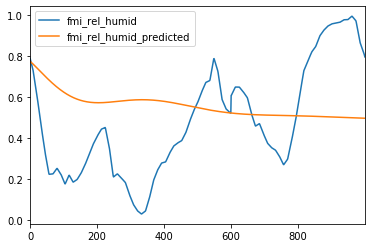

In [75]:
def plotter(var):
    xxx.plot(y=[var, var+"_predicted"])
    
plotter("fmi_rel_humid")